# **ALEGRIA FESTAS SA**

É uma empresa situada no Reino Unido, com modelo de negócio em E-commerce onde vendem online principalmente artigos de presente exclusivos para todos os ocasiões. Muitos clientes da empresa são atacadistas.

# **Problema de negócio:**

A equipe de marketing da "Alegria Festas SA", deseja encontrar clientes significativos para a empresa, que fazem grandes compras de seus produtos favoritos. A organização deseja lançar um programa de fidelidade para os clientes de alto valor após a identificação dos mesmos.
Más o time de marketing não tem conhecimento em análises avançadas de dados, então foi solicitado ao time de dados a resolução deste problema.

# **Desafio:**
 
Eric faz parte do time de cientistas de dados da empresa "Alegria Festas SA", que precisa determinar quem são os clientes elegíveis para participar do programa de fidelidade.
Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de forma a aumentar o faturamento e a frequência de compra.
Como resultado para esse projeto, é esperado que Eric entregue uma lista de pessoas elegíveis a participar do programa de fidelidade, junto com um relatório respondendo às seguintes perguntas:

1 - Quem são as pessoas elegíveis para participar do programa ?

2 - Quantos clientes farão parte do grupo?

3 - Quais as principais características desses clientes ?

4 - Qual a porcentagem de contribuição do faturamento, vinda destes clientes ?

5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?

6 - Quais as condições para uma pessoa ser elegível ao programa ?

7 - Quais as condições para uma pessoa ser removida do programa ?

8 - Qual a garantia que o programa criado é melhor que o restante da base ?

9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?

# **Roteiro da solução:**
 
1 - Preparar os dados para modelagem.
 
2 - Testar algoritmo de agrupamento.
 
3 - Avaliar o algoritmo.
 
4 - Responder as perguntas de negócio. 

5 - Traduzir a performance do modelo para resultado financeiro de negócio.

# **Dicionário de dados:** 

Este conjunto de dados do Varejo Online II contém todas as transações ocorridas para um varejo on-line registrado e não registrado no Reino Unido entre 01/12/2009 e 09/12 / 2011.

**InvoiceNo:** Número da fatura. Nominal. Um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começar com a letra 'c', isso indica um cancelamento.

**StockCode:** código do produto (item). Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto.

**Description:** Nome do produto (item). Nominal.

**Quantity:** as quantidades de cada produto (item) por transação. Numérico.

**InvoiceDate:** data e hora do inventário. Numérico. O dia e a hora em que uma transação foi gerada.

**UnitPrice:** preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).

**CustomerID:** Número do cliente. Nominal. Um número integral de 5 dígitos atribuído exclusivamente a cada cliente.

**Country:** nome do país. Nominal. O nome do país onde o cliente reside.

 Reconhecimentos: Extraído de http://archive.ics.uci.edu/ml/datasets/Online+Retail+II . Conjunto de dados fornecido pelo Dr. Daqing Chen, Diretor do Curso: MSc Data Science. chend '@' lsbu.ac.uk, Escola de Engenharia, London South Bank University, London SE1 0AA, UK.

# **Caixa de ferramentas**

In [ ]:
!pip install klib

In [ ]:
!pip install pmdarima

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.plotting.backend = "plotly"
 
import numpy  as np
 
import klib
 
from datetime import datetime
 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use("ggplot")
 
import seaborn           as sns
sns.set()
 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima           import auto_arima

# **Extração**

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/dados_tratado.csv",parse_dates=["InvoiceDate"])
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day,Month,Year,UnitPrice,TotalPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,1,12,2009,6.95000,83.40000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,1,12,2009,6.75000,81.00000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,1,12,2009,6.75000,81.00000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,1,12,2009,2.10000,100.80000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1,12,2009,1.25000,30.00000,13085.00000,United Kingdom


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824225 entries, 0 to 824224
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824225 non-null  object        
 1   StockCode    824225 non-null  object        
 2   Description  824225 non-null  object        
 3   Quantity     824225 non-null  int64         
 4   InvoiceDate  824225 non-null  datetime64[ns]
 5   Day          824225 non-null  int64         
 6   Month        824225 non-null  int64         
 7   Year         824225 non-null  int64         
 8   UnitPrice    824225 non-null  float64       
 9   TotalPrice   824225 non-null  float64       
 10  CustomerID   824225 non-null  float64       
 11  Country      824225 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 75.5+ MB


In [ ]:
# Mudando tipo de dados para reduzir uso de memória
cat = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for c in cat:
    dados[c] = dados[c].astype('category')
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824225 entries, 0 to 824224
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824225 non-null  category      
 1   StockCode    824225 non-null  category      
 2   Description  824225 non-null  category      
 3   Quantity     824225 non-null  int64         
 4   InvoiceDate  824225 non-null  datetime64[ns]
 5   Day          824225 non-null  int64         
 6   Month        824225 non-null  int64         
 7   Year         824225 non-null  int64         
 8   UnitPrice    824225 non-null  float64       
 9   TotalPrice   824225 non-null  float64       
 10  CustomerID   824225 non-null  float64       
 11  Country      824225 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 59.4 MB
None


# **Transformação**

Irei verificar as correlações entre os atributos dos dados para encontrar possíveis padrões nos consumidores.

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


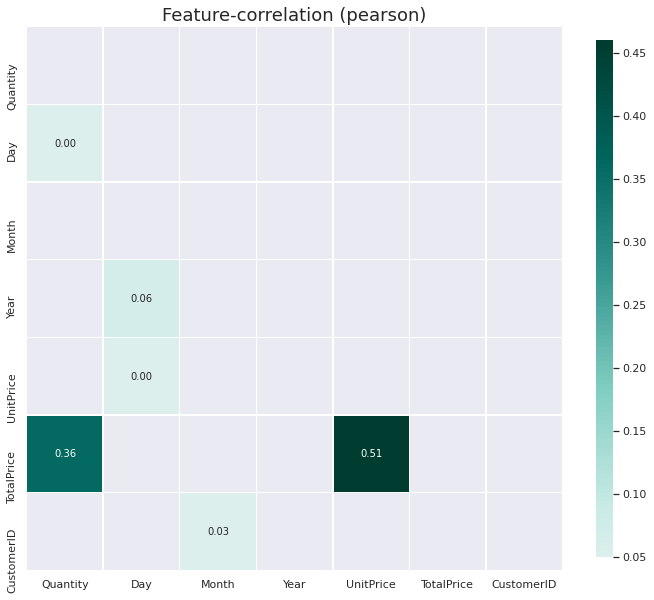

In [ ]:
# exibindo apenas correlações positivas
klib.corr_plot(dados, split='pos');

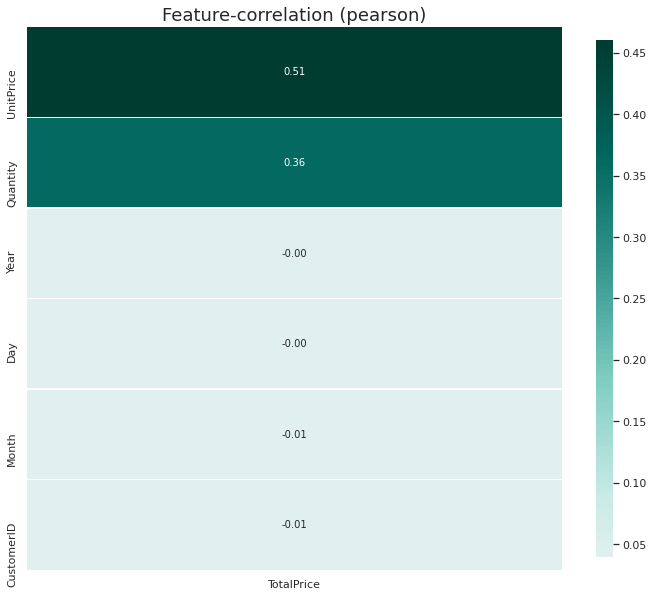

In [ ]:
# exibindo apenas correlações com o atributo preço total
klib.corr_plot(dados, target='TotalPrice');

Como é óbvio existe uma correlação positiva meia forte entre o preço unitário do produto, quantidade e o preço total.
 
É interessante que a uma correlação positiva fraca entre o mês e o consumidor e isto reforça as compras no final do ano que são mais frequentes por questões de queima de estoque e Black-Friday.

##**Modelagem de dados**

**Eu acredito que o preço total gasto por cada consumidor e a quantidade de produtos adquiridos sejam atributos relevantes para responder as perguntas de negócio e criar um agrupamento através dos algoritmos para selecionar e entender os consumidores alvos para o programa de fidelidade que será lançado pela equipe de marketing.**

Através de estatísticas dos valores gastos por cada consumidor pode-se ter uma noção de sua frequência de compras, média de custos, valores mais altos comprados e o total gasto ao longo de sua jornada no e-commerce.

In [ ]:
atributos = dados.groupby("CustomerID").agg({"TotalPrice":["sum","min","max","mean"]})
atributos.columns = ["sum","min","max","mean"]
atributos.head()

,sum,min,max,mean
CustomerID,,,,
12346.00000,810.40000,1.00000,142.31000,17.61739
12347.00000,5633.32000,5.04000,249.60000,22.26609
12348.00000,2019.40000,1.00000,240.00000,39.59608
12349.00000,4452.84000,1.25000,300.00000,24.73800
12350.00000,334.40000,8.50000,40.00000,19.67059


Os dados selecionados acima estão em escalas bastante diferentes além do mais são estatísticas com informações diferentes como mínimo de preço, soma de preço total e valor máximo por uma única compra e média . Logo algoritmos de clusterização que usam cálculos de distância para encontrar os melhores centroides, aglomerações e grupos irão sofrer com os dados desta maneira. Por isso irei utilizar uma técnica de padronização nos dados que tira a média do valores e subtrair pelo desvio padrão para diminuir a dificuldades do algoritmo no aprendizado e obter melhores resultados.

##**Padronização**

In [ ]:
scaler = StandardScaler()
atributos_scaler = scaler.fit(atributos)
atributos_scaler = scaler.transform(atributos)

In [ ]:
atributos_scaler

array([[-0.150918  , -0.08406668, -0.01936668, -0.09227   ],
       [ 0.17006087, -0.06594713,  0.13050984, -0.07526083],
       [-0.07045566, -0.08406668,  0.11709932, -0.01185191],
       ...,
       [-0.17643435, -0.05356843,  0.06680987, -0.0265342 ],
       [-0.11138364, -0.05491394, -0.11360352, -0.08332069],
       [ 0.07387675, -0.06594713, -0.04717954, -0.05850066]])

##**Método de cotovelo (elbow method)**

Na análise de cluster , o método de cotovelo é uma heurística usada para determinar o número de clusters em um conjunto de dados . O método consiste em representar graficamente a variação explicada em função do número de clusters e escolher o cotovelo da curva como o número de clusters a utilizar.

fonte - [Wikipedia](https://en.m.wikipedia.org/wiki/Elbow_method_(clustering))

Estamos calculando o WCSS (Soma do quadrado dentro do cluster). WCSS é a soma da distância quadrada entre cada ponto e o centróide em um cluster. Quando plotamos o WCSS com o valor K, o gráfico se parece com um cotovelo. Conforme o número de clusters aumenta, o valor WCSS começará a diminuir. O valor de WCSS é maior quando K = 1. Quando analisamos o gráfico, podemos ver que o gráfico mudará rapidamente em um ponto, criando assim uma forma de cotovelo. A partir deste ponto, o gráfico começa a se mover quase paralelo ao eixo X. O valor K correspondente a este ponto é o valor K ideal ou um número ótimo de clusters.

In [ ]:
wcss = []
values = range(1, 11)
 
for i in values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(atributos_scaler)
    wcss.append(kmeans.inertia_)

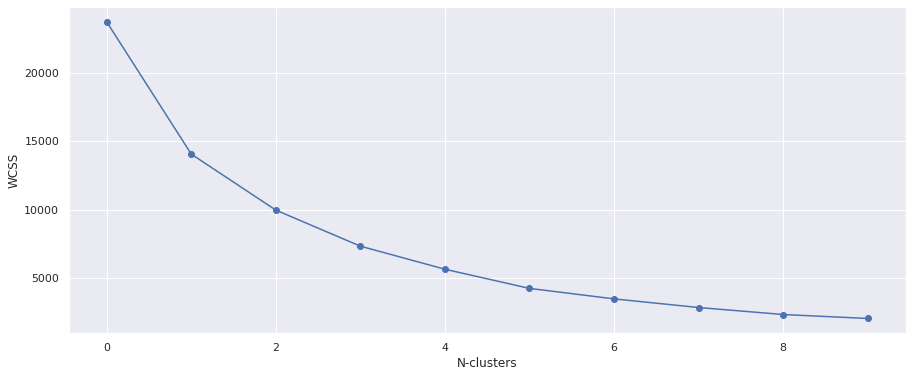

In [ ]:
plt.plot(wcss, marker="o")
plt.xlabel("N-clusters")
plt.ylabel("WCSS");

O gráfico leva a entender que o melhor número de cluster para separar os agrupamentos são 3, porquê a partir deste número o wcss já não sofre  queda.

##**Agrupamento com KMeans**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(atributos_scaler)
labels = kmeans.labels_

In [ ]:
# aqui demostra o número do cluster pertencente aos 5938 clientes
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([  15, 5914,    9]))

O cluster 0 ficou com 15 clientes
 
O cluster 1 com 5914
 
O cluster 2 com 9

In [ ]:
# média dos centroides padronizados
kmeans.cluster_centers_

array([[14.93150791, -0.07161921,  6.94547484,  1.07843669],
       [-0.0397662 , -0.03123281, -0.03741983, -0.03594262],
       [ 1.24496283, 20.64279419, 13.01319455, 21.82089905]])

In [ ]:
# Dataframe com valores dos centroides de cada cluster por colunas (padronizados)
centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[atributos.columns])

In [ ]:
centers

,sum,min,max,mean
0,14.93151,-0.07162,6.94547,1.07844
1,-0.03977,-0.03123,-0.03742,-0.03594
2,1.24496,20.64279,13.01319,21.82090


fica difícil interpretar os respectivos valores de cada cluster com os dados padronizados, por isso inversarei a padronização para o formato original.

In [ ]:
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(data = centers, columns = [atributos.columns])

In [ ]:
# clusters com médias de cada grupo pelos respectivos atributos
centers

,sum,min,max,mean
0,227433.83200,3.77533,5128.13333,337.57768
1,2480.52945,12.78003,129.38655,33.01196
2,21784.43333,4622.33556,9471.74667,6006.60167


**Cluster 0** - clientes com soma total média de gastos de 227.433 libras, gasto mínimo médio de 3.77 libras, gasto máximo médio de 5.128 libras, gasto médio total de 337.57 libras. Clientes do cluster 2 têm média total de gasto menor em relação aos clientes do cluster 1, porém eles realizaram compras caras tendo uma soma de custo média total muito maior. Eles são 15 clientes e irão fazer parte do **"Grupo Vip"** porquê se comportam como outliers.

**Cluster 1** - clientes com soma total de gasto em média de 2.480 libras esterlinas. Mínimo de gasto médio por compras de 12.78 libras esterlinas. Máximo de gasto médio por compras de 129.38 libras esterlinas. Média total de gastos por compras de 33.01 libras esterlinas. Clientes do cluster 0 são os que menos gastam em compras no e-commerce sendo estes 5914, vou considera-los como **"Grupo Basic"**.

**Cluster 2** - clientes com soma total de gasto médio de 21.784 libras, gasto mínimo médio de 4.622 libras, gasto máximo médio de 9.471 libras, gasto médio total de 6.006 libras. Dos 9 clientes que fazem parte deste cluster vou considera-los do **"Grupo Premium"**. Já que apesar de serem poucos têm um bom valor de compras na empresa.

In [ ]:
# atribuindo respectivos clusters para todos os clientes da base já segmentados
atributos["Cluster"] = kmeans.predict(atributos_scaler)

In [ ]:
atributos.head()

,sum,min,max,mean,Cluster
CustomerID,,,,,
12346.00000,810.40000,1.00000,142.31000,17.61739,1
12347.00000,5633.32000,5.04000,249.60000,22.26609,1
12348.00000,2019.40000,1.00000,240.00000,39.59608,1
12349.00000,4452.84000,1.25000,300.00000,24.73800,1
12350.00000,334.40000,8.50000,40.00000,19.67059,1


**Gráfico para análise de dispersão dos clusters**

In [ ]:
fig = px.scatter_3d(data_frame=atributos, x='max', y='mean', z='sum', color='Cluster')
fig.show()

In [ ]:
atributos["Grupo"] = atributos["Cluster"].apply(lambda x: "Vip" if x==0 else ("Basic" if x==1 else "Premium"))

In [ ]:
atributos.head()

,sum,min,max,mean,Cluster,Grupo
CustomerID,,,,,,
12346.00000,810.40000,1.00000,142.31000,17.61739,1,Basic
12347.00000,5633.32000,5.04000,249.60000,22.26609,1,Basic
12348.00000,2019.40000,1.00000,240.00000,39.59608,1,Basic
12349.00000,4452.84000,1.25000,300.00000,24.73800,1,Basic
12350.00000,334.40000,8.50000,40.00000,19.67059,1,Basic


# **Perguntas de negócio**

##**1 - Quem são as pessoas elegíveis para participar do programa ?**

São os clientes pertencentes aos grupos  (Vip e Premium), pois são os que mais geram rentabilidade em proporção para a empresa.

In [ ]:
elegiveis = atributos.loc[(atributos['Grupo']=='Vip') | (atributos['Grupo'] == 'Premium')]
elegiveis

,sum,min,max,mean,Cluster,Grupo
CustomerID,,,,,,
12415.00000,145647.45000,0.42000,1718.40000,147.41645,0,Vip
12918.00000,32860.50000,10953.50000,10953.50000,10953.50000,2,Premium
12931.00000,113395.01000,3.90000,4176.00000,402.10996,0,Vip
13694.00000,202140.10000,2.32000,952.00000,129.74332,0,Vip
14063.00000,46417.70000,10.90000,10468.80000,1079.48140,0,Vip
14156.00000,331317.85000,1.25000,2736.16000,80.24167,0,Vip
14646.00000,533862.97000,0.39000,4992.00000,137.41647,0,Vip
14911.00000,321681.73000,0.85000,1687.17000,27.70730,0,Vip
15061.00000,139245.56000,0.32000,2978.40000,139.52461,0,Vip


A lista de clientes elegíveis para participar do programa está acima, contendo os respectivos identificadores anônimos de cada um.

##**2 - Quantos clientes farão parte do grupo?**

In [ ]:
atributos["Grupo"].value_counts ()

Basic      5914
Vip          15
Premium       9
Name: Grupo, dtype: int64

##**3 - Quais as principais características desses clientes ?**

**Cluster 0** - clientes com soma total média de gastos de 227.433 libras, gasto mínimo médio de 3.77 libras, gasto máximo médio de 5.128 libras, gasto médio total de 337.57 libras. Clientes do cluster 2 têm média total de gasto menor em relação aos clientes do cluster 1, porém eles realizaram compras caras tendo uma soma de custo média total muito maior. Eles são 15 clientes e irão fazer parte do **"Grupo Vip"** porquê se comportam como outliers.

**Cluster 1** - clientes com soma total de gasto em média de 2.480 libras esterlinas. Mínimo de gasto médio por compras de 12.78 libras esterlinas. Máximo de gasto médio por compras de 129.38 libras esterlinas. Média total de gastos por compras de 33.01 libras esterlinas. Clientes do cluster 0 são os que menos gastam em compras no e-commerce sendo estes 5914, vou considera-los como **"Grupo Basic"**.

**Cluster 2** - clientes com soma total de gasto médio de 21.784 libras, gasto mínimo médio de 4.622 libras, gasto máximo médio de 9.471 libras, gasto médio total de 6.006 libras. Dos 9 clientes que fazem parte deste cluster vou considera-los do **"Grupo Premium"**. Já que apesar de serem poucos têm um bom valor de compras na empresa.

##**4 - Qual a porcentagem de contribuição do faturamento, vinda destes clientes ?**

In [ ]:
atributos.groupby("Grupo")["sum"].sum()

Grupo
Basic     14669851.13800
Premium     196059.90000
Vip        3411507.48000
Name: sum, dtype: float64

In [ ]:
# Porcentagem grupo Basic
14669851.13800 / atributos["sum"].sum() * 100

80.26216133067592

O grupo (Basic) detém 14.669.851,13 libras esterlinas que representa 80.26 % da fatura de vendas da empresa.

In [ ]:
# Porcentagem grupo Premium 
196059.90000 / atributos["sum"].sum() * 100

1.072689230193618

O grupo (Premium) detém 196.059,90 libras esterlinas, que representa 1.07 % da fatura de vendas da empresa.

In [ ]:
# Porcentagem grupo Vip
3411507.48000 / atributos["sum"].sum() * 100

18.665149439130435

O grupo (Vip) detém 3.411.507,48 libras esterlinas, que representa 18.67 % da fatura de vendas da empresa.

In [ ]:
# Passando a limpo porcentagens recebidas, tem que resultar em 100 !
18.67 + 1.07 + 80.26

100.0

##**5 - Qual a expectativa de faturamento desse grupo para os próximos meses ?**

In [ ]:
# Índices dos elegíveis já clusterizados
elegiveis.index

Float64Index([12415.0, 12918.0, 12931.0, 13694.0, 14063.0, 14156.0, 14646.0,
              14911.0, 15061.0, 15098.0, 15195.0, 15749.0, 15760.0, 15838.0,
              15849.0, 16029.0, 16151.0, 16684.0, 16981.0, 17450.0, 17511.0,
              17949.0, 18023.0, 18102.0],
             dtype='float64', name='CustomerID')

In [ ]:
# Pegando cópia da base Inicial e colocando índices com ID do consumidor
base = dados.copy()
base.set_index("CustomerID",inplace=True)

In [ ]:
# Seleciono os índices específicos dos clientes elegíveis
grupo_fatura = base.loc[[12415.0, 12918.0, 12931.0, 13694.0, 14063.0, 14156.0, 14646.0,
                         14911.0, 15061.0, 15098.0, 15195.0, 15749.0, 15760.0, 15838.0,
                         15849.0, 16029.0, 16151.0, 16684.0, 16981.0, 17450.0, 17511.0,
                         17949.0, 18023.0, 18102.0]]

In [ ]:
# Colocando data para formato de série temporal (ano, mês, dia) 
grupo_fatura["InvoiceDate"] = grupo_fatura["InvoiceDate"].dt.strftime("%Y-%m-%d")
grupo_fatura["InvoiceDate"] = pd.to_datetime(grupo_fatura["InvoiceDate"])

In [ ]:
# Preparação da série temporal com dados de preço total por dia
pre_serie = grupo_fatura.reset_index()
pre_serie = pre_serie[["InvoiceDate","TotalPrice"]]
ts_dia = pre_serie.groupby("InvoiceDate")["TotalPrice"].sum()
ts_dia

InvoiceDate
2009-12-01    8521.41000
2009-12-02   11399.68000
2009-12-03   27515.55000
2009-12-04    2529.89000
2009-12-07    3709.46000
                 ...    
2011-12-05    8419.46000
2011-12-06    7027.02000
2011-12-07   24144.55000
2011-12-08   14294.84000
2011-12-09     469.44000
Name: TotalPrice, Length: 505, dtype: float64

In [ ]:
# verificando o tipo de dado da série, (tem que ser datetime64[ns])
ts_dia.index

DatetimeIndex(['2009-12-01', '2009-12-02', '2009-12-03', '2009-12-04',
               '2009-12-07', '2009-12-08', '2009-12-09', '2009-12-10',
               '2009-12-11', '2009-12-14',
               ...
               '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=505, freq=None)

In [ ]:
print(f'Data mínima: {ts_dia.index.min()}')
print(f'Data máxima: {ts_dia.index.max()}')

Data mínima: 2009-12-01 00:00:00
Data máxima: 2011-12-09 00:00:00


In [ ]:
# verificando se há algum campo duplicado
ts_dia.duplicated().sum()

0

In [ ]:
# verificandose há algum campo nulo
ts_dia.isna().sum()

0

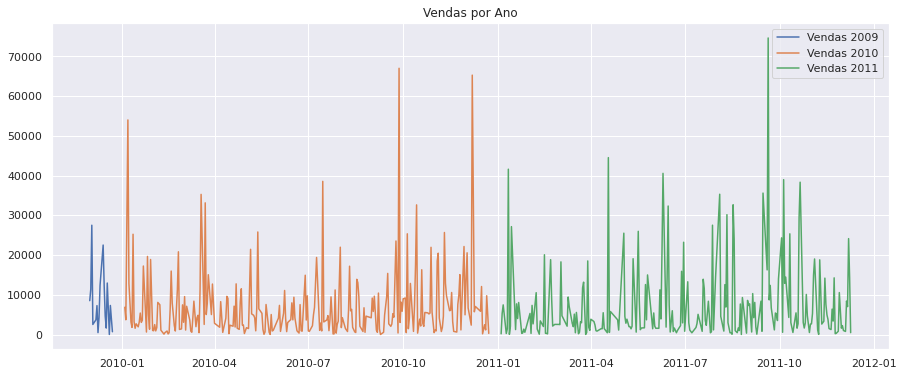

In [ ]:
plt.plot(ts_dia['2009'], label='Vendas 2009')
plt.plot(ts_dia['2010'], label='Vendas 2010')
plt.plot(ts_dia['2011'], label='Vendas 2011')
plt.title('Vendas por Ano')
plt.legend(loc='best')
plt.show();

Os grupos de clientes selecionados gastam bastante no final do ano, especificamente entre os meses de outubro a dezembro.

In [ ]:
# Selecionando todos os registros de preço de compras na base para aplicar média móvel de 7 dias 
media_movel = ts_dia.to_frame()
media_movel.head()

,TotalPrice
InvoiceDate,
2009-12-01,8521.41000
2009-12-02,11399.68000
2009-12-03,27515.55000
2009-12-04,2529.89000
2009-12-07,3709.46000


In [ ]:
# Calculando a média móvel de 7 dias com janelas deslizantes de toda a série temporal
media_movel["MM-7"] = media_movel.rolling(window=7).mean()

In [ ]:
print(media_movel)

             TotalPrice       MM-7
InvoiceDate                       
2009-12-01   8521.41000        nan
2009-12-02  11399.68000        nan
2009-12-03  27515.55000        nan
2009-12-04   2529.89000        nan
2009-12-07   3709.46000        nan
...                 ...        ...
2011-12-05   8419.46000 4365.84857
2011-12-06   7027.02000 3860.68143
2011-12-07  24144.55000 6459.02714
2011-12-08  14294.84000 8273.34143
2011-12-09    469.44000 8020.13286

[505 rows x 2 columns]


In [ ]:
fig = media_movel.plot(title='Média Móvel de 7 dias das (Vendas ao longo de todos os anos)', labels=dict(value="Vendas"))
fig.update_yaxes(tickprefix="$")
fig.show()

A média móvel de vendas do e-commerce caiu ao longo do mês de novembro, e teve uma pequena crescente ao mês de dezembro de 2011(últimos dias de vendas da base). Acredito que esta crescente se dá pela questão da vendas de produtos para o período natalino. Então existe chance destes clientes gerarem compras nos próximos meses.

**Modelagem de previsão de series temporais**

Vou utilizar previsões de series temporais para prever as possíveis arrecadações de vendas dos próximos meses.

**Teste de estacionáriedade**

*Verificarei se a série temporal é estacionária ou não, porquê a série temporal é dita estacionária se as suas propriedades estatísticas, tais como a média e variância permanecem constantes ao longo do tempo. Quando são estacionárias se torna mais fácil de modelar o fenômeno e acertar mais previsões.*
 
*Utilizarei o teste estatístico Dickey-Fuller Aumentado para verificar se a série é estacionária ou não, ele tem como premissa a hipótese nula de quê a série não é estacionária.*

**Hipótese nula (H0)** : se não for rejeitada, sugere que a série temporal tem raiz unitária, ou seja, não é estacionária. Tem alguma estrutura dependente do tempo.
 
**Hipótese alternativa 
(H1) :**  A hipótese nula é rejeitada; sugere que a série temporal não tem uma raiz unitária, o que significa que é estacionária. Não tem estrutura dependente do tempo.
 
**p-value > 0,05** : Falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e não são estacionários.
 
**p-value <= 0,05** : Rejeita a hipótese nula (H0), os dados não têm raiz unitária e são estacionários.

In [ ]:
# Função para testar estacionariedade com  Augmented Dickey-Fuller
 
def adf_teste(y):
    adftest = adfuller(y, autolag='AIC')
    adf_output = pd.Series(adftest[0:4], index=['ADF teste','p-value','Atrasos usados','Número de observações usadas'])
    print('Teste Dickey-Fuller')
    for key,value in adftest[4].items():
        adf_output['Valor crítico ({})'.format(key)] = value
 
    print(adf_output)

In [ ]:
# Testando estacionariedade
adf_teste(ts_dia)

Teste Dickey-Fuller
ADF teste                      -22.17188
p-value                          0.00000
Atrasos usados                   0.00000
Número de observações usadas   504.00000
Valor crítico (1%)              -3.44339
Valor crítico (5%)              -2.86729
Valor crítico (10%)             -2.56983
dtype: float64


*Como resultado do teste, a hipótese nula foi rejeitada, e a hipótese alternativa foi aceita, logo estatísticamente a série temporal é estacionária.*

**Decomposição da série temporal**

In [ ]:
#decomposicao = seasonal_decompose(ts_dia)
#tendencia    = decomposicao.trend
#sazonalidade = decomposicao.seasonal
#aleatorio    = decomposicao.resid

Recebi o erro acima porquê, apesar da minha série ser estacionária  conforme teste estatístico, ela contém datas onde não foram efetuadas compras (a loja possivelmente não estava no ar) e o algoritmo do statsmodels não consegue rodar a decomposicao da série com este detalhe, por busca de uma solução irei transformar a série temporal em tempo mensal e realizar novamente o teste de estacionariedade.

*Restabelecendo a data para granularidade mensal de vendas*

In [ ]:
# Colocando data para formato de série temporal (ano, mês, dia) 
grupo_fatura["InvoiceDate"] = grupo_fatura["InvoiceDate"].dt.strftime("%Y-%m")
grupo_fatura["InvoiceDate"] = pd.to_datetime(grupo_fatura["InvoiceDate"])

In [ ]:
# Preparação da série temporal com dados de preço total por mês
pre_serie = grupo_fatura.reset_index()
pre_serie = pre_serie[["InvoiceDate","TotalPrice"]]
ts_mes = pre_serie.groupby("InvoiceDate")["TotalPrice"].sum()
ts_mes.index

DatetimeIndex(['2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01',
               '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01',
               '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01',
               '2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='InvoiceDate', freq=None)

In [ ]:
# Transformando a série com escala logarítmica para reduzir a tendência e melhorar a busca por estacionariedade
 
ts_mes = np.log(ts_mes)

In [ ]:
# Verificando se a série temporal é estacionário ou não com o teste (Dickey-Fuller Aumentado)
 
adf_teste(ts_mes)

Teste Dickey-Fuller
ADF teste                      -2.67695
p-value                         0.07811
Atrasos usados                  9.00000
Número de observações usadas   15.00000
Valor crítico (1%)             -3.96444
Valor crítico (5%)             -3.08491
Valor crítico (10%)            -2.68181
dtype: float64


Hipótese nula aceita, estatiscamente a série temporal não é estacionária. (p-value > 0.05).

In [ ]:
# Decomposicao da série temporal 
decomposicao = seasonal_decompose(ts_mes)
tendencia    = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuos     = decomposicao.resid

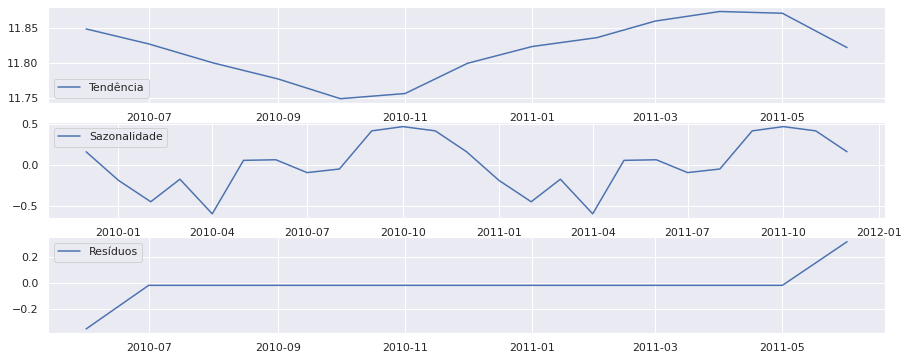

In [ ]:
fig, ax = plt.subplots(3)
ax[0].plot(tendencia, label='Tendência')
ax[0].legend()
ax[1].plot(sazonalidade, label='Sazonalidade')
ax[1].legend()
ax[2].plot(residuos, label='Resíduos')
ax[2].legend()
plt.show();

A decomposicao da série mensal identificou e removeu tendência de queda de vendas no mês de outubro de 2010, e crescimento de vendas em abril e maio de 2011.

Identificou os picos de sazonalidade onde os maiores picos foram em outubro de 2010 e 2011.

Identificou resíduos de aleatoriedade em julho de 2010 e 2011.

In [ ]:
ts_decomposta = residuos
ts_decomposta.dropna(inplace=True)
ts_decomposta

InvoiceDate
2010-06-01   -0.35328
2010-07-01   -0.01762
2010-08-01   -0.01762
2010-09-01   -0.01762
2010-10-01   -0.01762
2010-11-01   -0.01762
2010-12-01   -0.01762
2011-01-01   -0.01762
2011-02-01   -0.01762
2011-03-01   -0.01762
2011-04-01   -0.01762
2011-05-01   -0.01762
2011-06-01    0.31803
Name: resid, dtype: float64

In [ ]:
# Verificando se a série temporal é estacionário ou não com o teste (Dickey-Fuller Aumentado)
 
adf_teste(ts_decomposta)

Teste Dickey-Fuller
ADF teste                      -2.88675
p-value                         0.04691
Atrasos usados                  0.00000
Número de observações usadas   12.00000
Valor crítico (1%)             -4.13783
Valor crítico (5%)             -3.15497
Valor crítico (10%)            -2.71448
dtype: float64


p-value <= 0.05, hipótese nula rejeitada.

*Há um problema, a série temporal decomposta se tornou bastante pequena após a sua decomposição, então vou optar por utlizar a primeira série criada (por ano, mês e dia) para prever as vendas do mês, já quê o teste de estacionáriedade foi aceito a hipótese alternativa.*

**Previsão de series temporais**

In [ ]:
# 475 para treinar
train = ts_dia[:475]
 
# 30 dias para testar
test = ts_dia[475:]

In [ ]:
# Tamanho dados de treino
train.shape, train.index.min(), train.index.max()

((475,), Timestamp('2009-12-01 00:00:00'), Timestamp('2011-11-03 00:00:00'))

In [ ]:
# Tamanho dados de teste 
test.shape, test.index.min(), test.index.max()

((30,), Timestamp('2011-11-04 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [ ]:
# Treinamento do modelo arima automático para identificar automaticamente o melhor modelo
modelo = auto_arima(train, suppress_warnings=True)
modelo.fit(train)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

Ordem do modelo com ruído branco, média e variável a princípio estão ao longo de (0)

In [ ]:
 modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  475
Model:                        SARIMAX   Log Likelihood               -5034.698
Date:                Mon, 12 Jul 2021   AIC                          10073.395
Time:                        02:01:52   BIC                          10081.722
Sample:                             0   HQIC                         10076.670
                                - 475                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7192.7023    728.299      9.876      0.000    5765.263    8620.142
sigma2      9.419e+07   3.75e+06     25.086      0.000    8.68e+07    1.02e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3636.63
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             2.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo com métricas horríveis não é aceitável.

In [ ]:
previsao = pd.DataFrame(modelo.predict(n_periods=30),index=test.index)
previsao.columns = ['previsao_vendas']
previsao

,previsao_vendas
InvoiceDate,
2011-11-04,7192.70232
2011-11-07,7192.70232
2011-11-08,7192.70232
2011-11-09,7192.70232
2011-11-10,7192.70232
2011-11-11,7192.70232
2011-11-13,7192.70232
2011-11-14,7192.70232
2011-11-15,7192.70232


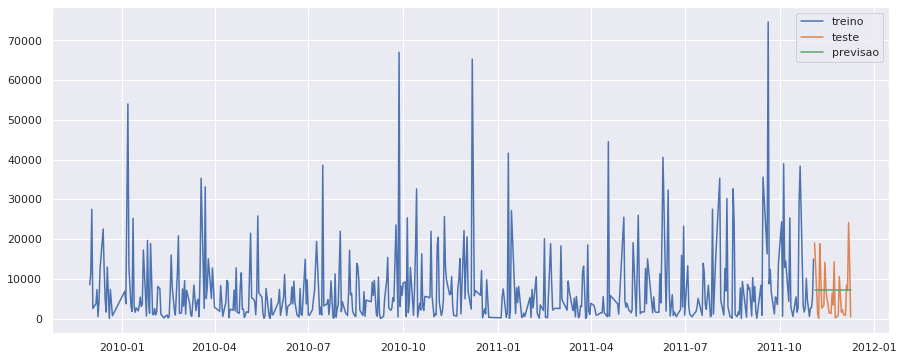

In [ ]:
plt.plot(train, label='treino')
plt.plot(test, label='teste')
plt.plot(previsao, label='previsao')
plt.legend();

O modelo está prevendo valores exatamente iguais conforme uma média.

In [ ]:
# Calculando preço previsto 
 
(7192.70232 * 30)

215781.06960000002

In [ ]:
# Calculando soma do preço original 
 
test.sum()

191033.77999999997

In [ ]:
# Tirando diferença do erro
215781.06960000002 - 191033.77999999997

24747.289600000047

**Resposta (5) - Qual a expectativa de faturamento desse grupo para os próximos meses ?**

Nos próximos 30 dias um valor entre 191 mil libras e 215 mil libras.

##**6 - Quais as condições para uma pessoa ser elegível ao programa ?**

As condições são estas pessoas fazerem parte dos grupos Vip e Premium com os seguintes critérios :

Para grupo Vip alcançar a média de preço pago no e-commerce no valor de 1.079,48 libras.

Para grupo Premium alcançar a média de  preço pago no e-commerce no valor de 10.953,50 libras.

In [ ]:
atributos.loc[(atributos["Grupo"] =='Vip')].describe()

,sum,min,max,mean,Cluster
count,15.00000,15.00000,15.00000,15.00000,15.00000
mean,227433.83200,3.77533,5128.13333,337.57768,0.00000
std,163417.53483,4.62748,4219.73887,299.08218,0.00000
min,46417.70000,0.32000,952.00000,27.70730,0.00000
25%,138803.06500,0.40500,1777.20000,133.57990,0.00000
50%,152783.29000,1.70000,3884.00000,203.98303,0.00000
75%,291024.26000,4.95000,7643.73500,491.04940,0.00000
max,619428.08000,15.00000,15818.40000,1079.48140,0.00000


In [ ]:
atributos.loc[(atributos["Grupo"]=='Premium')].describe()

,sum,min,max,mean,Cluster
count,9.00000,9.00000,9.00000,9.00000,9.00000
mean,21784.43333,4622.33556,9471.74667,6006.60167,2.00000
std,22958.01429,2914.46185,11300.04578,2760.77741,0.00000
min,3248.86000,297.00000,3248.86000,3248.86000,2.00000
25%,4217.59000,3248.86000,4217.59000,4217.59000,2.00000
50%,5876.34000,4217.59000,5876.34000,4620.86000,2.00000
75%,33628.55000,5795.87000,6958.17000,6725.71000,2.00000
max,67532.70000,10953.50000,38970.00000,10953.50000,2.00000


##**7 - Quais as condições para uma pessoa ser removida do programa ?**

Alcançar o estado Vip e Premium, mais parar de comprar por período longos de 30 a 60 dias.

##**8 - Qual a garantia que o programa criado é melhor que o restante da base ?**

A Garantia que o programa Vip e Premium   são melhores do quê o restante da base ("Basic") é a seguinte :
 
O Grupo Vip tem gasto máximo médio de 5.128 libras.
 
O Grupo Premium tem gasto máximo médio de 9.471 libras. 
  
Enquanto o Grupo Basic tem máximo de gasto médio por compras de 129.38 libras.

##**9 - Quais ações o time de marketing pode realizar para aumentar o faturamento?**

In [ ]:
# ID's dos clientes elegíveis para o programa Vip e Premium 
 
elegiveis.index

Float64Index([12415.0, 12918.0, 12931.0, 13694.0, 14063.0, 14156.0, 14646.0,
              14911.0, 15061.0, 15098.0, 15195.0, 15749.0, 15760.0, 15838.0,
              15849.0, 16029.0, 16151.0, 16684.0, 16981.0, 17450.0, 17511.0,
              17949.0, 18023.0, 18102.0],
             dtype='float64', name='CustomerID')

In [ ]:
# Pegando  só os campos onde são respectivos dos clientes Vip e Premium no conjunto de dados original para ver os produtos frequentemente comprados por eles 
 
new = dados["CustomerID"].isin([12415.00000, 12918.00000, 12931.00000, 13694.00000, 14063.00000, 14156.00000, 14646.00000,
                          14911.00000, 15061.00000, 15098.00000, 15195.00000, 15749.00000, 15760.00000, 15838.00000,
                          15849.00000, 16029.00000, 16151.00000, 16684.00000, 16981.00000, 17450.00000, 17511.00000,
                          17949.00000, 18023.00000, 18102.00000])

In [ ]:
# Dataframe com os dados de clientes elegíveis 
 
produtos_mkt = dados[new]

In [ ]:
produtos_mkt.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Day,Month,Year,UnitPrice,TotalPrice,CustomerID,Country
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,1,12,2009,0.98000,27.44000,18102.00000,United Kingdom


In [ ]:
# Número de produtos comprados pelos clientes Vip e Premium
lista_cliente_compras = produtos_mkt.groupby("CustomerID").agg({"Description":"count"}).reset_index()
lista_cliente_compras

,CustomerID,Description
0,12415.00000,988
1,12918.00000,3
2,12931.00000,282
3,13694.00000,1558
4,14063.00000,43
5,14156.00000,4129
6,14646.00000,3885
7,14911.00000,11610
8,15061.00000,998
9,15098.00000,4


Alguns clientes elegíveis fizeram apenas uma compra valiosa de um único produto na empresa e isso é um indicativo para o time de marketing enviar propostas de produtos para estes clientes.

In [ ]:
quant_produ = produtos_mkt.groupby("Description").agg({"Quantity":"sum"}).reset_index()

In [ ]:
quant_produ.head()

,Description,Quantity
0,DOORMAT UNION JACK GUNS AND ROSES,0
1,3 STRIPEY MICE FELTCRAFT,19
2,4 PURPLE FLOCK DINNER CANDLES,6
3,50'S CHRISTMAS GIFT BAG LARGE,448
4,ANIMAL STICKERS,0


In [ ]:
# Gráfico de árvore, Produtos vendidos por quantidade, quanto maior a quantidade de produto vendido maior e a caixa
fig = px.treemap(quant_produ, path=["Description"], values="Quantity")
fig.show();

As ações que o time de marketing pode fazer para aumentar o faturamento da empresa é enviar promoções de produtos mais vendidos conforme o gráfico acima para os clientes da **lista_cliente_compras**. E ter uma atenção especial com os clientes que se aproximam de entrar no Grupo Premium ou Vip, para quando estes clientes entrarem na lista também receberem propostas de produtos mais vendidos conforme as características e histórico de compras dos mesmos.

#**CARGA**

Irei salvar as bases de dados conforme a maneira que alimente a tomada de decisão da equipe de marketing. Serão as bases (atributos com os clientes segmentados por grupos, respectivamente pelas preços e estatísticas descritas) e também a lista de clientes por números de produtos mais comprados.

In [ ]:
# Salvo no disco a lista de clientes segmentados por clusters e grupos, acompanhando a ordem (Basic, Premium e Vip)
segmentacao_clientes = atributos.sort_values(by="Grupo")
segmentacao_clientes.to_excel("segmentacao_clientes.xlsx", sheet_name="segmentação_de_clientes")

In [ ]:
# Salva lista de clientes (Vip e Premium) por números de compras no disco
lista_cliente_compras.to_csv("lista_clientes_por_compras.csv", index=False)